In [18]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/kaggle_compitions/Digit_recognization/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
#checking unique numbers in train label column
unique = data['label'].unique()
print(unique)

n_classes = len(unique)
print("Number of classes: ",n_classes)

[1 0 4 7 3 5 8 9 2 6]
Number of classes:  10


In [6]:
x = data.drop(labels = ["label"], axis=1)
print(x)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0         0
41998       0       0       0       0  ...         0         0         0         0
41999       0       0       0       0  ...         0         0         0         0

[42

In [7]:
y = data['label']
print(y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [9]:
#Training Data and testing data
print("X_train: ", x_train)
print("X_test: ", y_test)
print("Y_train: ", y_train)
print("Y_test: ", y_test)

X_train:         pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
34941       0       0       0       0  ...         0         0         0         0
24433       0       0       0       0  ...         0         0         0         0
24432       0       0       0       0  ...         0         0         0         0
8832        0       0       0       0  ...         0         0         0         0
30291       0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
6265        0       0       0       0  ...         0         0         0         0
11284       0       0       0       0  ...         0         0         0         0
38158       0       0       0       0  ...         0         0         0         0
860         0       0       0       0  ...         0         0         0         0
15795       0       0       0       0  ...         0         0         0     

In [10]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [11]:
print("X_train: ",x_train)
print("X_train: ",x_test)

X_train:  [[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   

In [12]:
#determine the shape of input images
in_shape = x_train.shape[1:]
print(in_shape)

(28, 28, 1)


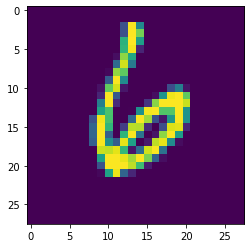

In [13]:
plt.imshow(x_train[0].reshape([28,28]))

In [14]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [15]:
from numpy import asarray, unique, argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = in_shape))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [24]:
# define loss and optimizer
model.compile(optimizer= optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
# fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose= 1)

Epoch 1/100
210/210 [==============================] - 33s 8ms/step - loss: 0.7007 - accuracy: 0.7704 - val_loss: 0.1633 - val_accuracy: 0.9525
Epoch 2/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0969 - accuracy: 0.9698 - val_loss: 0.0648 - val_accuracy: 0.9804
Epoch 3/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0669 - accuracy: 0.9792 - val_loss: 0.0465 - val_accuracy: 0.9875
Epoch 4/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0491 - val_accuracy: 0.9878
Epoch 5/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0361 - val_accuracy: 0.9893
Epoch 6/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0353 - val_accuracy: 0.9908
Epoch 7/100
210/210 [==============================] - 1s 7ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0440 - val_accuracy: 0.988

In [26]:
#Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy: %.3f' %accuracy)
print('Loss: ',loss)

263/263 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9894
Accuracy: 0.989
Loss:  0.048048876225948334


In [27]:
#make a pridiction
image = x_test[1]
ypred = model.predict(asarray([image]))
print('Prediction: Class =%d' %argmax(ypred))

Prediction: Class =1


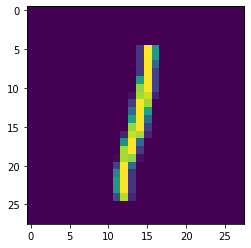

In [28]:
plt.imshow(x_test[1].reshape([28,28]))

In [29]:
#Pridict the model on the trained Data
test_data = pd.read_csv('/content/drive/My Drive/kaggle_compitions/Digit_recognization/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
test = test_data/255.0

In [31]:
test_final_Data = test.values.reshape(-1,28,28,1)

In [32]:
label = model.predict(test_final_Data)
print(label)

[[1.51240121e-18 2.77932659e-16 1.00000000e+00 ... 3.70869654e-11
  6.71691367e-15 1.78753172e-18]
 [9.99845862e-01 9.27981780e-09 9.63046318e-07 ... 1.81429684e-07
  5.07793084e-06 9.77786040e-05]
 [1.15298722e-08 2.74832587e-07 8.97673090e-06 ... 5.31364458e-06
  2.41907146e-05 9.91292536e-01]
 ...
 [1.76159179e-33 1.26436116e-20 4.30341996e-18 ... 2.19668445e-15
  9.90096283e-17 7.03928054e-18]
 [4.22357947e-11 9.48260492e-09 1.23001598e-07 ... 1.73859044e-05
  1.46154764e-06 9.95981216e-01]
 [4.32930935e-23 1.37376514e-21 1.00000000e+00 ... 5.16995096e-17
  1.59466380e-16 1.04729939e-23]]


In [33]:
label.shape

(28000, 10)

In [34]:
print(label)

[[1.51240121e-18 2.77932659e-16 1.00000000e+00 ... 3.70869654e-11
  6.71691367e-15 1.78753172e-18]
 [9.99845862e-01 9.27981780e-09 9.63046318e-07 ... 1.81429684e-07
  5.07793084e-06 9.77786040e-05]
 [1.15298722e-08 2.74832587e-07 8.97673090e-06 ... 5.31364458e-06
  2.41907146e-05 9.91292536e-01]
 ...
 [1.76159179e-33 1.26436116e-20 4.30341996e-18 ... 2.19668445e-15
  9.90096283e-17 7.03928054e-18]
 [4.22357947e-11 9.48260492e-09 1.23001598e-07 ... 1.73859044e-05
  1.46154764e-06 9.95981216e-01]
 [4.32930935e-23 1.37376514e-21 1.00000000e+00 ... 5.16995096e-17
  1.59466380e-16 1.04729939e-23]]


In [35]:
label = np.argmax(label, axis=1)

In [36]:
print(label)

[2 0 9 ... 3 9 2]


In [37]:
print(label.shape)

(28000,)


In [38]:
sample_submission = pd.read_csv('/content/drive/My Drive/kaggle_compitions/Digit_recognization/sample_submission.csv')
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [39]:
index = test_data.index.values + 1
data = {'ImageId' : index, "Label" : label}
df = pd.DataFrame(data=data)
df.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [40]:
submit = pd.DataFrame({'ImageId' : index, "Label" : label.astype(int).ravel()})
submit.to_csv("submission.csv",index = False)

In [41]:
submit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
